# 02806 Social Data Analisys and Visualization Final Project - Analyze the reasons and patterns behind the San Francisco's traffic crashes from 2005 to 2023.

## 1. Motivation

### 1.1 What is your dataset?
The dataset comprises comprehensive traffic crash data (resulting in an injury) in the city of San Francisco sourced from the [San Francisco government][1], spanning **from 2005 to 2023**. The dataset is **49.3 MB** as a csv file, including **59,000 rows** and **55 columns**, detailing crucial features including crash timing (datetime), location, weather, road conditions, light conditions and casualty statistics, and so on. In addition, the data also introduces the collision group involved, e.g. if it is a vehicles only crash, or a vehicle-bicycle crash, or vehicle-pedestrian crash, etc.

### 1.2 Why did you choose this/these particular dataset(s)?
We selected this particular dataset firstly because of its substantial size, offering a wide array of columns for multifaceted analysis and a significant number of rows to not only do deep dive analysis, but also potentially facilitate the application of machine learning algorithms, enabling us to forecast potential traffic crash occurrences. Moreover, the dataset's content is of particular interest to us as it holds the promise of revealing insights into the causes and patterns of traffic crashes, with the potential to contribute to the reduction of accidents in San Francisco and even save lives through the dissemination of data-driven truths.

### 1.3 What was your goal for the end user's experience?

Our goal for the end user's experience is firstly to systematically unveil the underlying reasons and patterns behind traffic crashes in San Francisco to the end user. Secondly we are also dedicated to presenting this information in a simple, clean but attrative manner, ensuring that our visualizations effectively convey the true narrative and insights clearly, regardless of the user's expertise in visualizations, meanwhile making the end user feel engaged while reading through our story. By prioritizing simplicity, we aim to avoid overwhelming the end user and instead offer a clear and accessible understanding of the data's truth and story.

## 2. Basic stats

### 2.1 Write about your choices in data cleaning and preprocessing
The dataset comes from the San Francisco govenment with quite many columns and has some null values when we initially doing analysis by screening the csv file itself, based on the [best practices][2] of data cleaning, we hence decide to do below steps of cleaning.
1. **Remove redundant columns**: This step ensure that we narrow our focus to valuable and informative columns, we remove the columns that cannot or hard to be used to analyze the reasons/patterns behind the traffic crashes.
2. **Deduplicate records handling**: This step ensure that we use a dataset without duplicates, to avoid wrong analysis result coming from the duplicated records.
3. **Deal with missing data**: This step ensure that we use proper way to handle missing data, so that we use accurate dataset to do the analysis.
4. **Filter out data outliers**: It is important to handle the outliers while there are many numeric features, however in our dataset we have mostly categorizing features, so we skip this step in our project.


#### 2.1.1 Remove redundant columns

In [8]:
import pandas as pd

# Read data source from local path
source_df = pd.read_csv('/Users/wegz/Downloads/Traffic_Crashes_Resulting_in_Injury_20240412.csv', low_memory=False)
# Drop columns that are not needed
source_df.drop(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
                'geocode_source', 'geocode_location', 'juris', 'officer_id',
                'beat_number', 'weather_2', 'control_device', 'vz_pcf_code',
                'vz_pcf_group', 'vz_pcf_description', 'vz_pcf_link', 'dph_col_grp',
                'data_as_of', 'data_loaded_at'], axis=1, inplace=True)


#### 2.1.2 Duplicate records handling

In [11]:
print(f'source df duplicated count: {source_df.duplicated().sum()}')
source_df.drop_duplicates(inplace=True)
print(f'source df duplicated count after drop: {source_df.duplicated().sum()}')


source df duplicated count: 0
source df duplicated count after drop: 0


#### 2.1.3 Deal with missing data
Given the critical nature of our data source, ensuring accuracy and reliability is paramount. In handling missing data, our approach prioritizes the preservation of data integrity. Consequently, the most appropriate method involves filtering out rows lacking key feature values, thereby guaranteeing that our analysis is based solely on complete and reliable data.

In [18]:
# Check which columns have null values
source_df.isnull().sum()[source_df.isnull().sum() > 0]
# Define key feature columns which needs to be handled
columns_to_handle = ['tb_latitude', 'tb_longitude', 'collision_time', 'day_of_week', 'time_cat']
# Drop rows with null values in key feature columns, and assign the result to a new dataframe df
df = source_df.dropna(subset=columns_to_handle)
# df is now ready to be used for analysis.


### 2.2 Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

We made some visualizations in order to see the distribution of the traffic crash data from different perspective, so that we know firstly if the dataset looks correct, secondly if there is any feature looks very skewed, thirdly to have a brief understanding which feature could be more interesting to deep dive and dig furture into.  
*We have conducted additional visualizations beyond those presented here, however aiming to maintain conciseness within our notebook we only highlight the most critical and intriguing ones.*

In [20]:
# Dependencies and set up default color.
import matplotlib.pyplot as plt
# Define the light blue color
light_blue = (0.68, 0.85, 0.9)
# Set the default color cycle to use the light blue color
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[light_blue])


#### 2.1 The count of traffic crash over the years from 2005 to 2023.

From below chart we can see that the overall traffic crash counts appear relatively consistent, with a noticeable decline from 2019 to 2020, followed by a gradual increase. We attribute this trend to the impact of the COVID-19 pandemic, a hypothesis supported by a news article [3] that validates our observation.

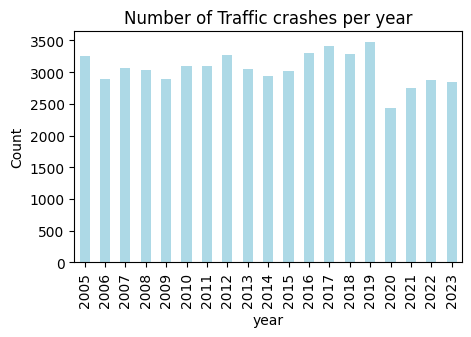

In [24]:
# Group by 'accident_year' and count the occurrences
type_counts = df['accident_year'].value_counts()
type_counts_sorted = type_counts.sort_index()

plt.figure(figsize=(5, 3))

# Plotting the bar chart
type_counts_sorted.plot(kind='bar')
plt.title('Number of Traffic crashes per year')
plt.xlabel('year')
plt.ylabel('Count')

# Display the plot
plt.show()


#### 2.2 The distribution of traffic crash count by type of the collision.
The below chart clearly illustrates that Broadside collisions has a significantly higher count compared to other types. To address the risks associated with Broadside collisions, modern vehicles should equip with safety features such as side-impact airbags, reinforced side structures, and side-curtain airbags to avoid the fatalities as much as possible. Furthermore, there could be advancements in traffic management, including the implementation of roundabouts and other intersection designs, aim to decrease the likelihood of these specific types of crashes.

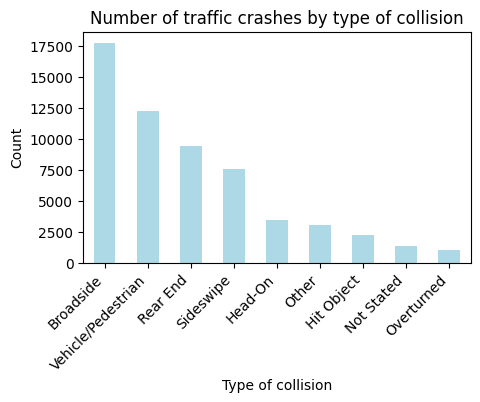

In [28]:
# Group by 'type_of_collision' and count the occurrences
type_counts = df['type_of_collision'].value_counts()

plt.figure(figsize=(5, 3))

# Plotting the bar chart
type_counts.plot(kind='bar')
plt.title('Number of traffic crashes by type of collision')
plt.xlabel('Type of collision')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


#### 2.3 The distribution of traffic crash fatalities by parties involved type.

Given the severity of fatalities, our focus is to discern patterns based on the types of parties involved. The chart indicates that incidents involving Vehicle - Pedestrian interactions are most prevalent, aligning with the reality that individuals are more vulnerable compared to mechanical entities. This observation underscores the need to prioritize efforts aimed at reducing this specific type of crash to ultimately save lives.  
Due to the limited volume of available results data, we have chosen to transition our analytical focus from a narrow emphasis on fatalities to a broader, more comprehensive level of data analysis.



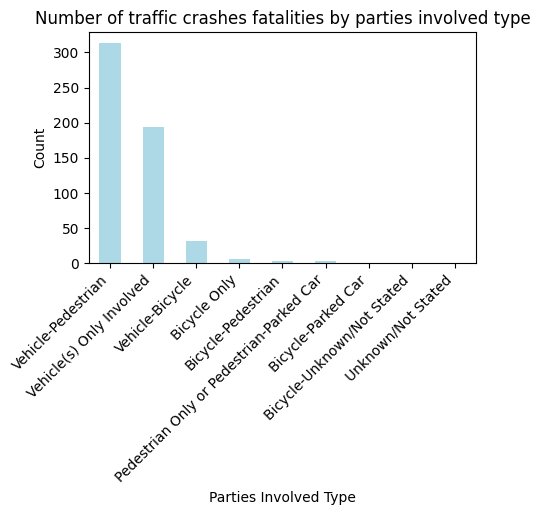

In [35]:
# Filter only records that have fatalities
number_killed_df = df[df['number_killed']>0]

# Group by 'collision_severity' and count the occurrences
crash_type_sums = number_killed_df.groupby('dph_col_grp_description')['number_killed'].sum()
# Sort the sums in descending order to have the most fatalities at the top
crash_type_sums = crash_type_sums.sort_values(ascending=False)
plt.figure(figsize=(5, 3))

# Plotting the bar chart
crash_type_sums.plot(kind='bar')
plt.title('Number of traffic crashes fatalities by parties involved type')
plt.xlabel('Parties Involved Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


## 3. Data Analysis

### 3.1 Describe your data analysis and explain what you've learned about the dataset.

### 3.2 If relevant, talk about your machine-learning.

## 4. Genre

### 4.1 Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

### 4.2 Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## 5. Visualizations

### 5.1 Explain the visualizations you've chosen.

### 5.2 Why are they right for the story you want to tell?

## 6. Discussion

### 6.1 What went well?

### 6.2 What is still missing? What could be improved?, Why?

## 7. Contributions

## 8. References
[1] Dataset source: https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data  
[2] Data Cleaning Steps & Process to Prep Your Data for Success: https://monkeylearn.com/blog/data-cleaning-steps/
[3] Bay Area Highway Deaths Drop In 2020, Reflecting Decline In Traffic During Pandemic: https://www.cbsnews.com/sanfrancisco/news/bay-area-highway-deaths-drop-in-2020-reflecting-decline-in-traffic-during-pandemic/